# Visualization of the dataset

In [42]:
# Remove this line if installing via pip. 
import sys 
sys.path.insert(0,'../')

Let's first load all the required packages and install the non-required packages `pandas` and `seaborn` for performing the visualizations.

In [ ]:
%pip install pandas seaborn

In [ ]:
# Visualization packages
import pandas as pd
import seaborn as sns

# Load all required packages. 
from torch_geometric.transforms import Compose, FaceToEdge

# Load the mantra dataset
from mantra.datasets import ManifoldTriangulations
from mantra.transforms import NodeIndex, RandomNodeFeatures

We create the dataset with three transforms.

The MANTRA dataset consists of triangulations with indices starting at $1$. 
Since `torch_geometric` is expecting $0$-indexed triangulations, we transform 
the dataset to a $0$-indexed dataset using the `NodeIndex` transform.
The `FaceToEdge` transform adds the edge indices given the triangulation.

For vizualisation and GNN architectures, we add random normal node feature 
to each vertex in the manifold.


In [ ]:
# Instantiate the dataset. Following the `torch-geometric` API, we download the 
# dataset into the root directory. 
dataset = ManifoldTriangulations(root="./data", dimension=2, version="latest",
                                 transform=Compose([
                                        NodeIndex(),
                                        RandomNodeFeatures(),
                                        FaceToEdge(remove_faces=False),
                                        ]
                                    ),
                                    force_reload=True,
                                )


Let us now have a look at the dataset and inspect the attributes each manifold has.

In [45]:
manifold = dataset[0]
print(manifold)

Data(id='manifold_2_4_1', triangulation=[4], dimension=[1], n_vertices=[1], betti_numbers=[3], torsion_coefficients=[3], name='S^2', genus=[1], orientable=[1], face=[3, 4], x=[4, 8], edge_index=[2, 12])


In [ ]:
# The number of vertices it has.
print(manifold.n_vertices)

# The dimension of the submanifold.
print(manifold.dimension)

# Vertex coordinates.
print(manifold.x)

# Edge indices
print(manifold.edge_index)

# Triangles (or faces)
print(manifold.face)

tensor([4])
tensor([2])
tensor([[0.6607, 0.7624, 0.4432, 0.9999, 0.1373, 0.2800, 0.4610, 0.5221],
        [0.6359, 0.5237, 0.2403, 0.9161, 0.2283, 0.5222, 0.8331, 0.9862],
        [0.8414, 0.6905, 0.4954, 0.7668, 0.6087, 0.4721, 0.9083, 0.2066],
        [0.4898, 0.8760, 0.3770, 0.3564, 0.6845, 0.6733, 0.6590, 0.0375]])
tensor([[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3],
        [1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2]])
tensor([[0, 0, 0, 1],
        [1, 1, 2, 2],
        [2, 3, 3, 3]])


For prediction and regression tasks, MANTRA has the following (topological) attributes  available.

In [47]:
# The Betti numbers of the manifold. 
print(manifold.betti_numbers)

# Whether the manifold is orientable or not. 
print(manifold.orientable)

# The name of the manifold.
print(manifold.name)

[1, 0, 1]
tensor([True])
S^2


## Betti numbers

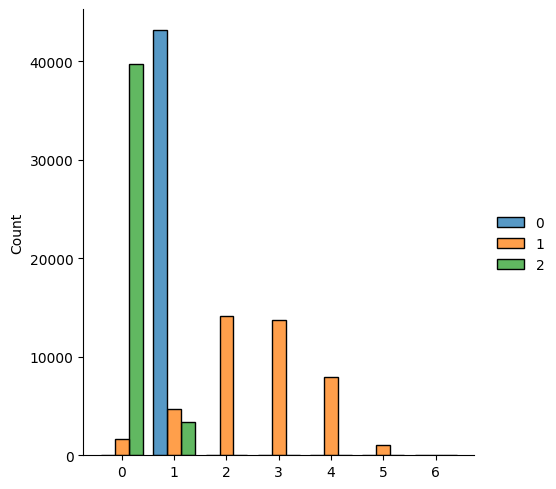

In [48]:
betti_numbers_df = pd.DataFrame(dataset.betti_numbers)
sns.displot(betti_numbers_df,multiple="dodge",discrete=True,shrink=.8)

The plot above describes the distribution of Betti numbers for all manifolds in the dataset.
On the vertical axis we have the counts, and on the horizontal axis the value of a given 
betti number (e.g. $\beta_1 = 0$,$\beta_1 = 1$, ..., $\beta_1 = n$).  

Since all manifolds consist of one connected, $\beta_0=1$ for all, as can be seen in the histogram. 
For the first betti numbers, the values are more evenly spread out, with most having a 
values between $\beta_1=0$ and $\beta_1=5$. Lastly, second Betti number has values between 
$\beta_2 = 0$ or $\beta_1=1$.

## Orientability

Orientability is a binary prediction task that purely depends on the triangulations. Only a 
fraction of the triangulations are orientable, making this a challenging task.

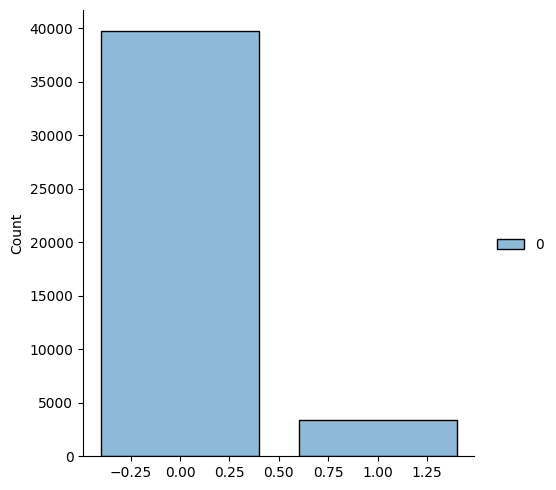

In [49]:
orientable_df = pd.DataFrame(dataset.orientable)
sns.displot(orientable_df,discrete=True,shrink=.8)

## Name 

The name is the mathimatical name (such as a Torus, Sphere or Klein Bottle) of the manifold if it has one.
Manifolds without a name are represented by the empty string `""`. The task is to predict the name of the 
manifold given its triangulation.

#

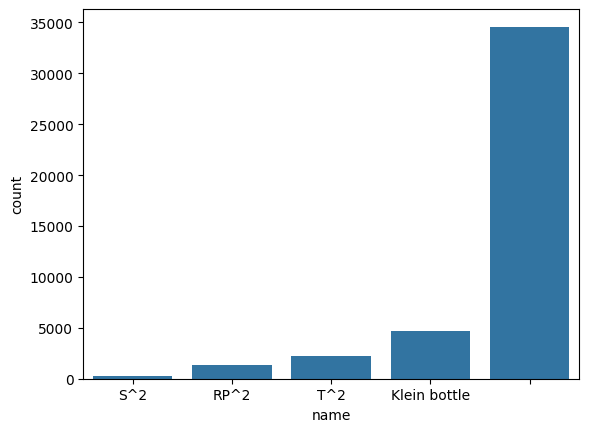

In [50]:
name_df = pd.DataFrame(dataset.name,columns=['name'])
sns.countplot(name_df,x="name");